In [390]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [391]:
img_width, img_height = 64, 64

train_data_dir = '17_04/train'
#validation_data_dir = '../input/main-dataset/main_dataset/validation'
test_data_dir = '17_04/test'
nb_train_samples = 1000
nb_validation_samples = 300
epochs = 200
batch_size = 30
#regularizer = tf.keras.regularizers.l2(0.01,)

#if K.image_data_format() == 'channels_first':
#  input_shape = (3, img_width, img_height)
#else:
input_shape = (img_width, img_height, 3)

In [392]:
train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    #shear_range = 0.3,
    #zoom_range = 0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip = True
)

test_datagen = ImageDataGenerator(#rescale = 1./255
)

In [393]:
train_batches = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #classes=['EOISINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
    class_mode = 'categorical')

Found 1026 images belonging to 3 classes.


In [394]:
test_batches = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = 300,
    #color_mode = 'grayscale',
    class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [395]:
def plots(ims, figsize=(12,6), rows=None, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [396]:
imgs, labels = next(train_batches)

In [397]:
#model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [398]:
#Eoisinophil=8[1.0.0.0],Lymphocyte=4[0.1.0.0],monocyte=2[0.0.1.0],neutrophil=1[0.0.0.1]-->Labels
#plots(imgs, rows=4, titles=labels)

In [399]:
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(11,11), strides= 4,
#                        padding= 'valid', activation= 'relu',
#                        input_shape= input_shape,
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None)) 

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Flatten())
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(1000, activation= 'relu'))
#model.add(Dense(4, activation= 'softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [400]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())

#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [401]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())         
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_117 (Ba  (None, 62, 62, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_118 (Conv2D)         (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_118 (Ba  (None, 60, 60, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_119 (Conv2D)         (None, 58, 58, 64)        36928     
                                                                 
 batch_normalization_119 (Ba  (None, 58, 58, 64)     

In [402]:
%%time
h = model.fit_generator(
    train_batches,
    steps_per_epoch = 8,
    epochs = epochs,
    validation_data = test_batches,
    validation_steps = nb_validation_samples // batch_size,
    #callbacks=[
    #    tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model_{val_accuracy:.3f}.h5', save_best_only=True,
    #                                      save_weights_only=False, monitor='val_accuracy')
    #]
)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
8/8 [==============================] - 35s 3s/step - loss: 10.4681 - accuracy: 0.3056 - val_loss: 90.5640 - val_accuracy: 0.3333
Epoch 2/200
8/8 [==============================] - 42s 5s/step - loss: 3.7339 - accuracy: 0.4125
Epoch 3/200
8/8 [==============================] - 31s 4s/step - loss: 3.9845 - accuracy: 0.3750
Epoch 4/200
8/8 [==============================] - 20s 2s/step - loss: 2.1228 - accuracy: 0.4583
Epoch 5/200
8/8 [==============================] - 21s 2s/step - loss: 2.0019 - accuracy: 0.5375
Epoch 6/200
8/8 [==============================] - 15s 2s/step - loss: 2.1968 - accuracy: 0.4250
Epoch 7/200
8/8 [==============================] - 16s 2s/step - loss: 1.7607 - accuracy: 0.4000
Epoch 8/200
8/8 [==============================] - 15s 2s/step - loss: 1.3703 - accuracy: 0.5083
Epoch 9/200
8/8 [==============================] - 15s 2s/step - loss: 1.0599 - accuracy: 0.5926
Epoch 10/200
8/8 [==============================] - 15s 2s/step - loss: 1.1560 - ac

8/8 [==============================] - 12s 2s/step - loss: 0.3567 - accuracy: 0.8981
Epoch 81/200
8/8 [==============================] - 13s 2s/step - loss: 0.3020 - accuracy: 0.8833
Epoch 82/200
8/8 [==============================] - 13s 2s/step - loss: 0.3100 - accuracy: 0.8833
Epoch 83/200
8/8 [==============================] - 14s 2s/step - loss: 0.3122 - accuracy: 0.8833
Epoch 84/200
8/8 [==============================] - 14s 2s/step - loss: 0.2593 - accuracy: 0.8958
Epoch 85/200
8/8 [==============================] - 14s 2s/step - loss: 0.2945 - accuracy: 0.8833
Epoch 86/200
8/8 [==============================] - 13s 2s/step - loss: 0.3334 - accuracy: 0.8472
Epoch 87/200
8/8 [==============================] - 12s 2s/step - loss: 0.3468 - accuracy: 0.8750
Epoch 88/200
8/8 [==============================] - 13s 2s/step - loss: 0.3448 - accuracy: 0.8750
Epoch 89/200
8/8 [==============================] - 13s 2s/step - loss: 0.4028 - accuracy: 0.8583
Epoch 90/200
8/8 [===============

8/8 [==============================] - 13s 2s/step - loss: 0.4149 - accuracy: 0.8500
Epoch 164/200
8/8 [==============================] - 13s 2s/step - loss: 0.3623 - accuracy: 0.8292
Epoch 165/200
8/8 [==============================] - 13s 2s/step - loss: 0.3544 - accuracy: 0.8417
Epoch 166/200
8/8 [==============================] - 13s 2s/step - loss: 0.3986 - accuracy: 0.8625
Epoch 167/200
8/8 [==============================] - 14s 2s/step - loss: 0.3180 - accuracy: 0.8708
Epoch 168/200
8/8 [==============================] - 13s 2s/step - loss: 0.3074 - accuracy: 0.8958
Epoch 169/200
8/8 [==============================] - 12s 2s/step - loss: 0.2930 - accuracy: 0.9028
Epoch 170/200
8/8 [==============================] - 15s 2s/step - loss: 0.2808 - accuracy: 0.8917
Epoch 171/200
8/8 [==============================] - 14s 2s/step - loss: 0.3123 - accuracy: 0.9083
Epoch 172/200
8/8 [==============================] - 13s 2s/step - loss: 0.2796 - accuracy: 0.8833
Epoch 173/200
8/8 [=====

In [403]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [404]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [405]:
model.save('model_0.92015612.h5')
test_model = load_model('model_0.92015612.h5')

In [406]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [407]:
predictions

array([[5.48321678e-20, 1.00000000e+00, 7.66217256e-10],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02349427e-03, 8.20667207e-01, 1.76309347e-01],
       [7.01824059e-31, 1.00000000e+00, 1.53959289e-16],
       [2.07514386e-03, 4.84805331e-02, 9.49444294e-01],
       [2.64284918e-14, 1.00000000e+00, 4.13190726e-08],
       [1.66928764e-08, 6.43206993e-04, 9.99356806e-01],
       [4.85130204e-06, 6.95500448e-02, 9.30445075e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.02479401e-35, 0.00000000e+00],
       [1.29361664e-16, 1.00000000e+00, 4.52751436e-09],
       [7.14143316e-05, 2.54023790e-01, 7.45904803e-01],
       [1.22971029e-03, 3.83417964e-01, 6.15352333e-01],
       [4.40724023e-07, 9.99583066e-01, 4.16478812e-04],
       [6.46511316e-02, 2.45730191e-01, 6.89618647e-01],
       [1.71841681e-02, 9.74546611e-01, 8.26925598e-03],
       [1.00000000e+00, 6.44505400e-20, 2.10084098e-27],
       [2.58969670e-17, 9.00847

In [408]:
rounded_prediction = np.argmax(predictions, axis=-1)

In [409]:
for i in rounded_prediction:
    print(i)

1
0
1
1
2
1
2
2
0
0
1
2
2
1
2
1
0
2
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
2
1
2
1
2
1
1
1
2
1
2
0
2
2
0
1
1
1
0
0
1
2
1
0
1
1
0
1
2
1
1
2
1
0
2
1
1
1
1
2
0
1
1
1
1
1
1
1
1
1
1
1
2
2
0
1
2
1
1
1
1
0
0
2
2
2
0
0
2
1
1
0
0
2
1
1
1
1
1
1
2
1
2
1
2
0
1
1
0
1
1
2
0
1
1
0
1
1
0
0
0
2
2
1
1
2
1
2
2
2
2
2
2
2
2
1
1
2
1
1
0
2
1
0
1
2
0
0
1
1
2
1
0
1
1
1
0
0
1
1
1
1
2
2
0
1
1
2
1
1
1
1
2
1
0
1
1
0
0
1
0
2
1
1
1
1
1
1
1
2
1
0
2
1
1
0
2
2
1
1
1
0
1
1
2
2
2
0
0
1
1
2
1
0
1
1
2
2
2
1
1
1
1
1
1
1
1
0
0
0
2
1
0
2
0
1
1
1
0
2
1
1
0
1
1
1
2
0
1
2
1
1
1
1
0
1
1
2
1
1
1
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
2
0
2
1


In [410]:
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_prediction)

In [411]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54 34 12]
 [ 3 79 18]
 [ 3 53 44]]


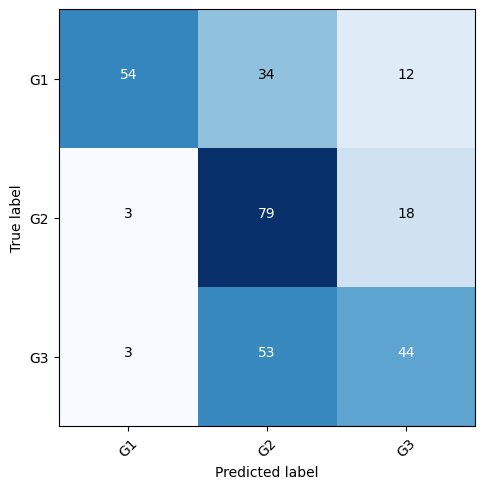

In [412]:
cm_plot_labels = ['G1','G2', 'G3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


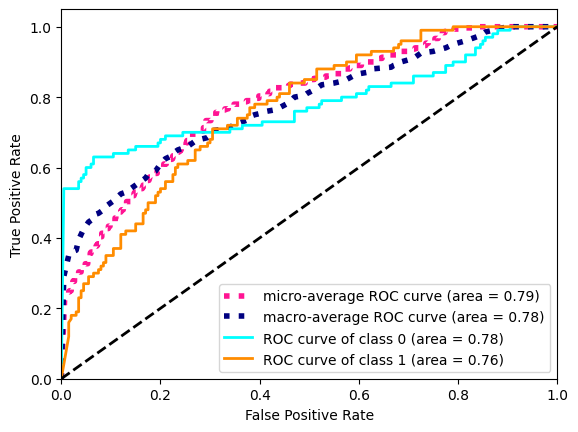

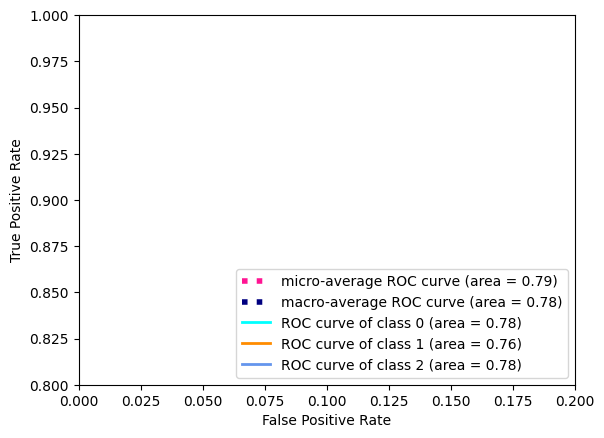

In [413]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [414]:
from sklearn.metrics import classification_report

In [415]:
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68       100
           1       0.48      0.79      0.59       100
           2       0.59      0.44      0.51       100

    accuracy                           0.59       300
   macro avg       0.66      0.59      0.59       300
weighted avg       0.66      0.59      0.59       300



In [416]:
score = metrics.log_loss(test_labels,predictions)
print("Log loss score: {}".format(score))

Log loss score: 3.7092970435091925


ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

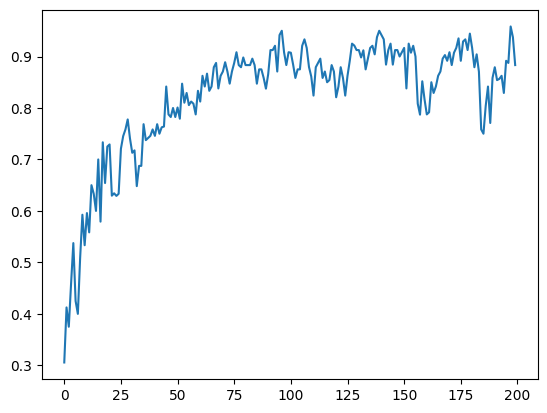

In [417]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
accs = h.history['loss']
val_accs = h.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()